Pair Programming Asunciones Regresión Lineal - 3

In [ ]:
!pip install researchpy

In [ ]:
!pip install scipy

In [2]:
import numpy as np          # Tratamiento de datos
import pandas as pd
import random 
import matplotlib.pyplot as plt  # Gráficos
import seaborn as sns
from scipy import stats         # # Estadísticos
import researchpy as rp
from scipy.stats import levene
plt.rcParams["figure.figsize"] = (10,8) 
pd.options.display.max_columns = None

El objetivo de este pairprgramming es que evaluéis si vuestro set de datos cumple todas las asunciones que se deben cumplir para hacer una regresión lineal. Cada asunción la deberéis testar de forma visual y analítica. Recordamos que estas asunciones son:
 -  Normalidad (ya la deberíais haber evaluado)
 -  Homogeneidad de varianzas
 -  Independencia de las variables
     

In [3]:
df = pd.read_csv('wellness_1.csv', index_col = 0)
df.head(2)

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,CORE_CIRCLE,SOCIAL_NETWORK,BMI_RANGE,DAILY_STEPS,SLEEP_HOURS,SUFFICIENT_INCOME,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,5,5,1,5,7,1,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,3,10,2,5,8,2,2,6,36 to 50,Female,655.6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15286 entries, 0 to 15285
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15286 non-null  object 
 1   FRUITS_VEGGIES           15286 non-null  int64  
 2   DAILY_STRESS             15286 non-null  object 
 3   CORE_CIRCLE              15286 non-null  int64  
 4   SOCIAL_NETWORK           15286 non-null  int64  
 5   BMI_RANGE                15286 non-null  int64  
 6   DAILY_STEPS              15286 non-null  int64  
 7   SLEEP_HOURS              15286 non-null  int64  
 8   SUFFICIENT_INCOME        15286 non-null  int64  
 9   TIME_FOR_PASSION         15286 non-null  int64  
 10  WEEKLY_MEDITATION        15286 non-null  int64  
 11  AGE                      15286 non-null  object 
 12  GENDER                   15286 non-null  object 
 13  WORK_LIFE_BALANCE_SCORE  15286 non-null  float64
dtypes: float64(1), int64(9

In [4]:
# cambiamos el tipo de datos a 3 columnas:
for col in['DAILY_STRESS', 'BMI_RANGE', 'SUFFICIENT_INCOME']:
    df[col] = df[col].astype('category') 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15286 entries, 0 to 15285
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Timestamp                15286 non-null  object  
 1   FRUITS_VEGGIES           15286 non-null  int64   
 2   DAILY_STRESS             15286 non-null  category
 3   CORE_CIRCLE              15286 non-null  int64   
 4   SOCIAL_NETWORK           15286 non-null  int64   
 5   BMI_RANGE                15286 non-null  category
 6   DAILY_STEPS              15286 non-null  int64   
 7   SLEEP_HOURS              15286 non-null  int64   
 8   SUFFICIENT_INCOME        15286 non-null  category
 9   TIME_FOR_PASSION         15286 non-null  int64   
 10  WEEKLY_MEDITATION        15286 non-null  int64   
 11  AGE                      15286 non-null  object  
 12  GENDER                   15286 non-null  object  
 13  WORK_LIFE_BALANCE_SCORE  15286 non-null  float64 
dtypes: cat

In [ ]:
# . info variables:
# - FRUITS_VEGGIES   
#     - Select 5 if more than 5, per day
# - DAILY_STRESS/day           
#     - 0: Not much stress---> 5: A lot of stress
# - CORE_CIRCLE/n             n
#     - close family and friends ready to provide you with a long-term unconditional support.
# - SOCIAL_NETWORK/nday           
#     - True interactions and dialogues at home, at work, at the gym
# - BMI_RANGE                
#     - masa corporal < 25 : 1, >= 25 :2  Your body mass in kg divided by the square of your height in meters
# - DAILY_STEPS*1000              
#     -  in thousand steps, daily
# - SLEEP_HOURS/day              horas sueño por dia
#     - Hours per night
# - SUFFICIENT_INCOME        salario
#     - Not or hardly sufficient:1 x Sufficient:2
# - TIME_FOR_PASSION         horas/día
#     - Daily hours spent doing what you are passionate and dreaming abou
# - WEEKLY_MEDITATION  
#     - nº veces/semana
# - AGE
#     - <= 20 / 21-35/36-50/>=51
# - GENDER                   

# - WORK_LIFE_BALANCE_SCORE 
#     - < 550:poor / > 680: good / > 700: excellent ("The Work-Life Balance Score is the total of all five categories: a  poor score is below 550,  a good score is above 680, an excellent score is above 700.")

In [6]:
# cambiamos por comodidad el nombre de la columna respuesta
# df3 = df.copy()
# df3.rename = (columns = {'WORK_LIFE_BALANCE_SCORE' : 'SCORE'}, inplace = True)

In [34]:
df4 = df.copy()

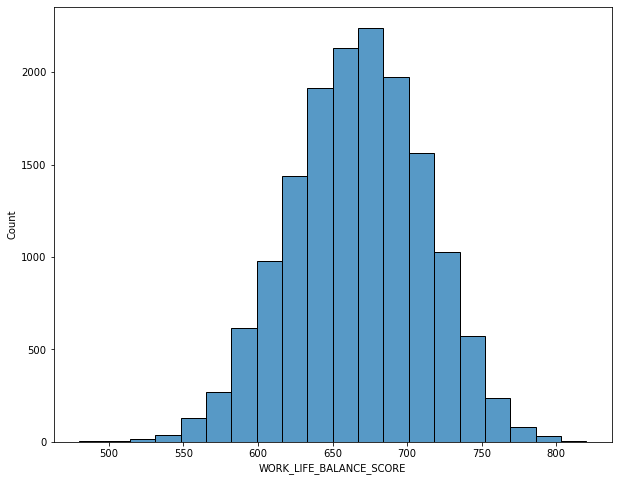

In [35]:
# comprobamos normalidad para variable respuesta
sns.histplot(df4['WORK_LIFE_BALANCE_SCORE'],  bins=20);

--> La grafica no presenta forma perfecta de la campana de Gauss, está cerca pero se nota alguna irregulariad en la distribución. De todo modo, lo habíamos comprobado en el pair anterior que la variable respuesta no tiene distribución normal. Presentamos el test nuevamente.

- test de normalidade

In [6]:
# Test de Kolmogorov-Smirnov (nº observaciones > 50)
from scipy.stats import kstest

In [8]:
kstest(df4['WORK_LIFE_BALANCE_SCORE'], 'norm')


KstestResult(statistic=1.0, pvalue=0.0)

> Distribución es normal: pvalor < 0,05 : podemos rechazar la H0 por lo que los datos no son normales.

- Homogeneidad de varianzas (homocedasticidad):
    - Significa que las varianzas no varían entre los diferentes niveles de las variables.
    - violin plot, boxplot

In [9]:
df4.head(2)

# ['WORK_LIFE_BALANCE_SCORE']

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,CORE_CIRCLE,SOCIAL_NETWORK,BMI_RANGE,DAILY_STEPS,SLEEP_HOURS,SUFFICIENT_INCOME,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,5,5,1,5,7,1,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,3,10,2,5,8,2,2,6,36 to 50,Female,655.6


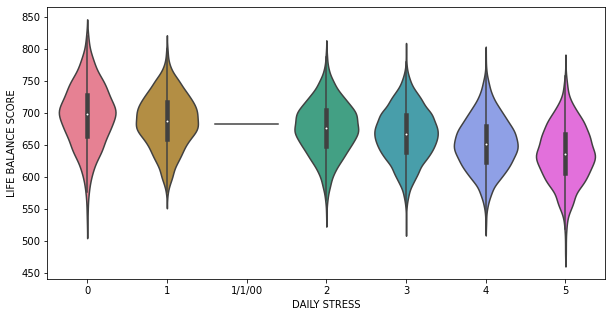

In [16]:
# vemos la relacion con el nível de stress diário:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.violinplot(
    x       = 'DAILY_STRESS',
    y       = 'WORK_LIFE_BALANCE_SCORE',
    data    = df4,
    palette = 'husl',
    ax      = ax
)
# ax.set_title('')
ax.set_ylabel('LIFE BALANCE SCORE')
ax.set_xlabel('DAILY STRESS');

media : punto blanco, rango intercuatílico : barra negra, hilos negros: 1Q y 3Q
Interpretación: ??

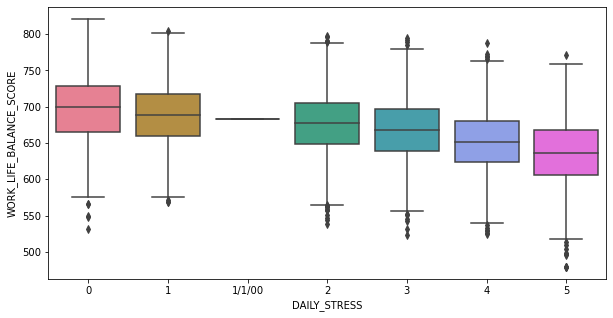

In [15]:
# con un boxplot:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.boxplot(
    x       = 'DAILY_STRESS',
    y       = 'WORK_LIFE_BALANCE_SCORE',
    data    = df4,
    palette = 'husl',
    ax      = ax
)
# ax.set_title('')
ax.set_ylabel('WORK_LIFE_BALANCE_SCORE')
ax.set_xlabel('DAILY_STRESS');

- -->  Vemos que las medianas así como las varianzas son similares. 
- --> Haremos un regplot para visualizar si las variables numéricas cumplen o no la asunción de homogeneidad de varianzas.




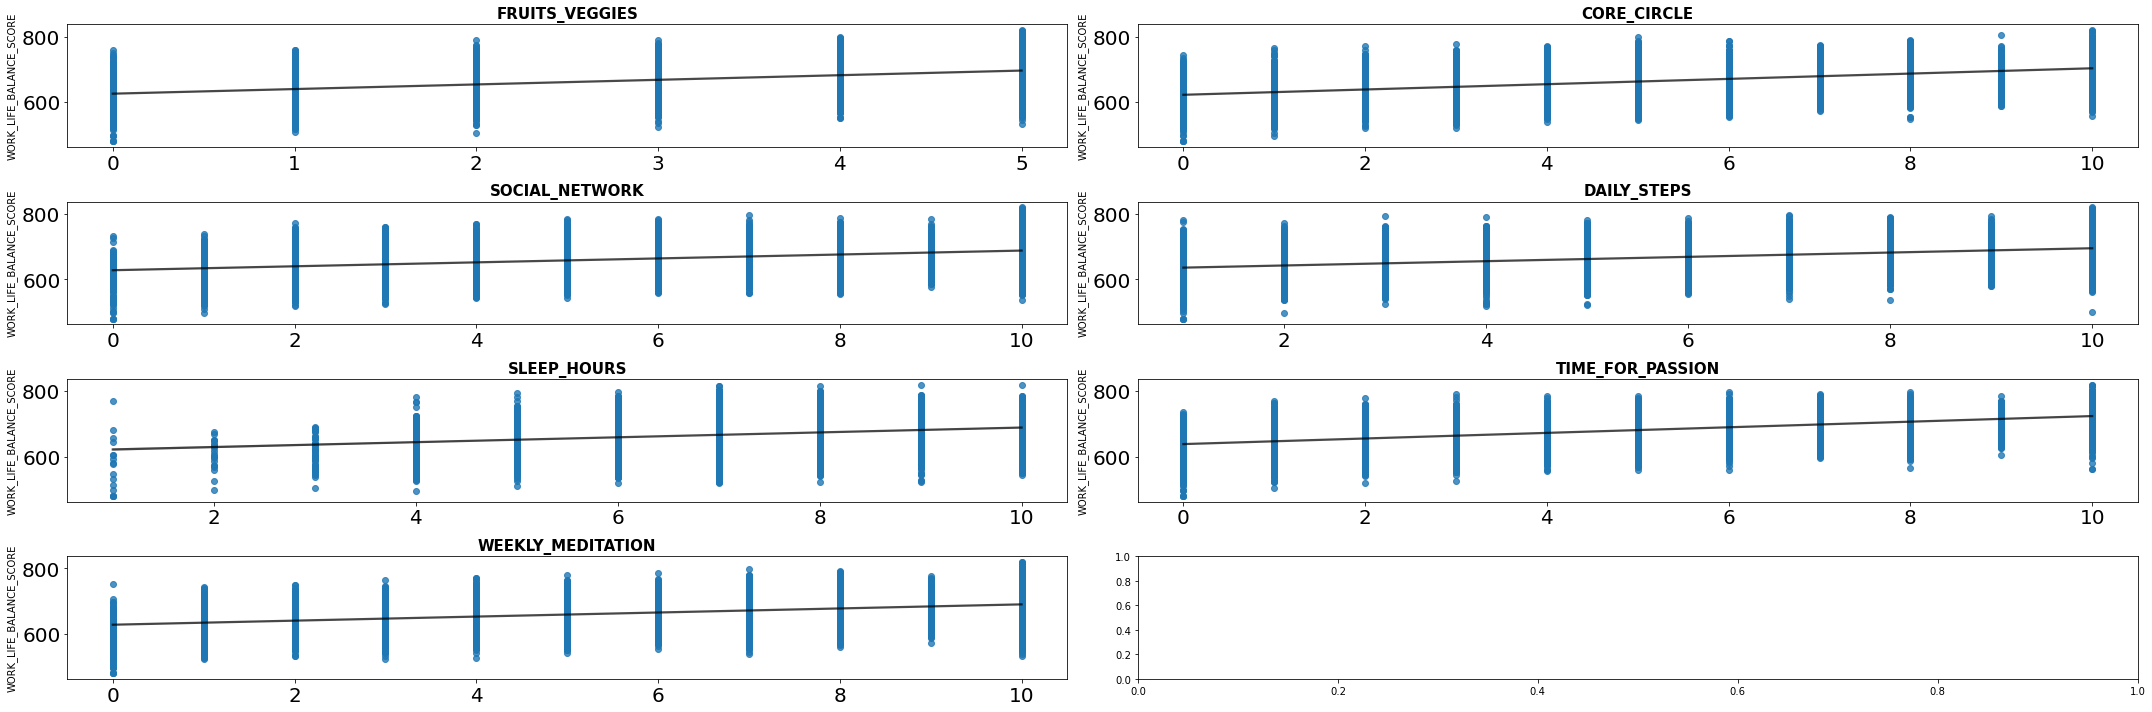

In [24]:

fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (30, 10))

# definimos una lista de colores. Cada color corresponderá a una gráfica
lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

# hemos creado una gráfica con varios subplots. Si queremos automatizar el proceso de relleno de cada uno de los plots
## podemos usar el método .flat. Lo que hace es aplanar los ejes para que queden en una única dimensión
## y luego los vamos rellenando. 
axes = axes.flat

# seleccionamos las columnas que queremos graficar
columns_numeric = df4.select_dtypes(include = np.number).drop('WORK_LIFE_BALANCE_SCORE', axis=1)
columns_numeric = columns_numeric.columns

# iniciamos un for loop para no tener que escribir la misma línea de código muchas veces
for i, column in enumerate(columns_numeric): 
    sns.regplot(
        data = df4,
        x = column,
        y = 'WORK_LIFE_BALANCE_SCORE',
        #color = lista_colores[i],
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])
    
    # establecemos el título de cada gráfica
    axes[i].set_title(column, fontsize = 15, fontweight = "bold")

    # establacemos el tamaño de la letras de los ejes
    axes[i].tick_params(labelsize = 20)

    # establecemos que no queremos que aparezca nada en el eje x
    axes[i].set_xlabel("")
    
# ajustamos el tamaño de cada subplot para que no se vean superpuestos. 
fig.tight_layout();



- --> No(?) cumple la homogeneidad de varianzas: "En el regplot lo que vemos es la recta que se ajusta a los puntos. Si la dispersión de los puntos es constante en todo el intervalo podremos decir que si se cumple la asunción de homogeneidad de varianzas. "
- Lo veremos analiticamente:
    - test de Levene: Si no se tiene la seguridad de que las poblaciones de origen son normales, utilizando la mediana.
    - H0 (hipótesis nula): las varianzas son iguales => hay homogeneidad de las varianzas u homocedasticidad (pvalor>0.05);
    - H1 (hipótesis alternativa): las varianzas son distintas => no hay homogeneidad( pvalor<0.05)

In [36]:
# vamos aplicar a la columna 
df4['DAILY_STRESS'].unique()

['2', '3', '1', '4', '5', '0', '1/1/00']
Categories (7, object): ['0', '1', '1/1/00', '2', '3', '4', '5']

In [37]:
# cambiamos el valor '1/1/00' por el valor más frecuente y confirmamos:
df4['DAILY_STRESS'].value_counts()

3         4142
2         3269
4         2875
1         2377
5         1970
0          652
1/1/00       1
Name: DAILY_STRESS, dtype: int64

In [40]:
df4['DAILY_STRESS'].replace(['1/1/00'], '3', inplace = True)

In [41]:
df4['DAILY_STRESS'].value_counts()

3    4143
2    3269
4    2875
1    2377
5    1970
0     652
Name: DAILY_STRESS, dtype: int64

In [42]:
# extraemos los distintos dataframes que necesitaremos
no_stress = df4[df4['DAILY_STRESS'] == '0']['WORK_LIFE_BALANCE_SCORE']
normal_stress = df4[df4['DAILY_STRESS'] == '1']['WORK_LIFE_BALANCE_SCORE']
some_stress = df4[df4['DAILY_STRESS'] == '2']['WORK_LIFE_BALANCE_SCORE']
much_stress = df4[df4['DAILY_STRESS'] == '2']['WORK_LIFE_BALANCE_SCORE']
too_much_stress = df4[df4['DAILY_STRESS'] == '3']['WORK_LIFE_BALANCE_SCORE']
a_lot_stress = df4[df4['DAILY_STRESS'] == '4']['WORK_LIFE_BALANCE_SCORE']

In [44]:
# Levene test

levene_test = stats.levene(no_stress, normal_stress, some_stress, much_stress , too_much_stress, a_lot_stress, center='median')
levene_test

LeveneResult(statistic=6.181837045952128, pvalue=9.877997007703825e-06)

In [45]:
# Bartlett test
bartlett_test = stats.bartlett(no_stress, normal_stress, some_stress, much_stress , too_much_stress, a_lot_stress)
bartlett_test

BartlettResult(statistic=39.01648408780297, pvalue=2.3567624242506787e-07)

- --> pvalor < 0.05 : las variables analizadas no cumplen con la asunción de homocedasticidad => aceptamos la hip. alternativa => no hay homogeneidad => varianzas distintas.

In [46]:
# ahora analizamos las numéricas
numerics = df4.select_dtypes(include = np.number)
numerics.head(2)


,FRUITS_VEGGIES,CORE_CIRCLE,SOCIAL_NETWORK,DAILY_STEPS,SLEEP_HOURS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE
0,3,5,5,5,7,0,5,609.5
1,2,3,10,5,8,2,6,655.6


In [49]:
results = {}             # creamos un diccionario para almacenar los resultados de los test
numerics_col = df.select_dtypes(include = np.number).drop('WORK_LIFE_BALANCE_SCORE', axis = 1).columns        # eliminamos seleción la columna var. respuesta

for col in numerics_col:           #iteramos por la lista de las columnas numéricas
     statistic, p_val = levene(df4[col], df4.WORK_LIFE_BALANCE_SCORE, center='median')              # calculamos el p-valor de test
     results[col] = p_val         # lo almacenamos en el diccionario

In [50]:
results

{'FRUITS_VEGGIES': 0.0,
 'CORE_CIRCLE': 0.0,
 'SOCIAL_NETWORK': 0.0,
 'DAILY_STEPS': 0.0,
 'SLEEP_HOURS': 0.0,
 'TIME_FOR_PASSION': 0.0,
 'WEEKLY_MEDITATION': 0.0}

--> No cumplen la asunción : todos los resultados para pvalor son < 0.05 => varianzas distintas => heterocedasticidad 

 - Independencia de las variables: test Chi-cuadrado
     - 'Basándose en los recuentos de celdas, es posible probar si existe una relación o dependencia, entre las variables y estimar la fuerza de la relación. Esto se hace probando la diferencia entre el recuento esperado, y el recuento observado.':
        -  *H0 : variables indepiendentes => pvalor>0.05 => no rechazo H0*
        - *H1 : variables dependientes => pvalor < 0.05 => rechazo H0*
     
     

In [55]:
crosstab, test_results, expected = rp.crosstab(df4['SLEEP_HOURS'], df4['DAILY_STRESS'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")


In [56]:
crosstab.head()

DAILY_STRESS                                    
DAILY_STRESS            0     1     2     3     4     5   All
SLEEP_HOURS                                                  
1                    0.03  0.00  0.01  0.02  0.01  0.04  0.11
2                    0.00  0.01  0.01  0.05  0.03  0.03  0.14
3                    0.02  0.01  0.07  0.07  0.05  0.10  0.32
4                    0.06  0.18  0.22  0.24  0.43  0.45  1.58
5                    0.15  0.73  0.96  1.77  1.33  1.52  6.47

In [57]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 45.0) =,785.6376
1,p-value =,0.0000
2,Cramer's V =,0.1014


--> Estas variables son dependientes

In [58]:
# para probar, hacemos con otras dos variables que a priori no son dependientes: masa corporal y salario.
crosstab1, test_results1, expected1 = rp.crosstab(df4['BMI_RANGE'], df4['SUFFICIENT_INCOME'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")


In [59]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 45.0) =,785.6376
1,p-value =,0.0000
2,Cramer's V =,0.1014


--> ?????????